In [2]:
from tensorflow import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import librosa as librosa
import librosa.display
import IPython.display as ipd

In [3]:

input_audio = keras.Input(shape =(28,28,1))

x = layers.Conv2D(16,(3,3), activation ='relu', padding = 'same')(input_audio)
x = layers.MaxPooling2D((2,2), padding = 'same')(x)
x = layers.Conv2D(8,(3,3), activation = 'relu', padding = 'same')(x)
x = layers.MaxPooling2D((2,2), padding = 'same')(x)
x = layers.Conv2D(8,(3,3), activation = 'relu', padding = 'same')(x)
encoded = layers.MaxPooling2D((2,2), padding = 'same')(x)

x = layers.Conv2D(8,(3,3), activation ='relu', padding = 'same')(encoded)
x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2D(8,(3,3), activation ='relu', padding = 'same')(x)
x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2D(16,(3,3), activation = 'relu')(x)
x = layers.UpSampling2D((2,2))(x)
decoded = layers.Conv2D(1,(3,3), activation = 'sigmoid', padding = 'same')(x)

autoencoder = keras.Model(input_audio, decoded)

In [15]:
encoded = keras.Model(input_audio, encoded)

In [16]:
encoded.summary()
x_test.shape

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0   

(10000, 28, 28, 1)

In [5]:
autoencoder.compile(optimizer='adam', loss = 'binary_crossentropy')

In [6]:
(x_train, _), (x_test,_) = mnist.load_data()
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
x_train = np.reshape(x_train, (len(x_train),28,28,1))
x_test = np.reshape(x_test, (len(x_test), 28,28,1))
y_train = np.copy(x_train)
x_train += np.random.rand(*x_train.shape)*.7
x_train = np.minimum(x_train, 1)

In [7]:
from keras.callbacks import TensorBoard
autoencoder.fit(x_train, y_train, epochs = 10, batch_size=128, shuffle=True, validation_data = (x_test, x_test))

Epoch 1/10
469/469 [==============================] - 21s 43ms/step - loss: 0.3800 - val_loss: 0.3388
Epoch 2/10
469/469 [==============================] - 20s 43ms/step - loss: 0.1875 - val_loss: 0.4519
Epoch 3/10
469/469 [==============================] - 20s 43ms/step - loss: 0.1692 - val_loss: 0.5503
Epoch 4/10
469/469 [==============================] - 20s 42ms/step - loss: 0.1597 - val_loss: 0.5458
Epoch 5/10
469/469 [==============================] - 20s 43ms/step - loss: 0.1543 - val_loss: 0.4936
Epoch 6/10
469/469 [==============================] - 20s 43ms/step - loss: 0.1506 - val_loss: 0.5134
Epoch 7/10
469/469 [==============================] - 20s 42ms/step - loss: 0.1471 - val_loss: 0.4662
Epoch 8/10
469/469 [==============================] - 20s 43ms/step - loss: 0.1442 - val_loss: 0.4482
Epoch 9/10
469/469 [==============================] - 21s 45ms/step - loss: 0.1420 - val_loss: 0.4036
Epoch 10/10
469/469 [==============================] - 20s 42ms/step - loss: 0.139

In [8]:
decoded_audio = autoencoder.predict(x_train)

<function matplotlib.pyplot.show(close=None, block=None)>

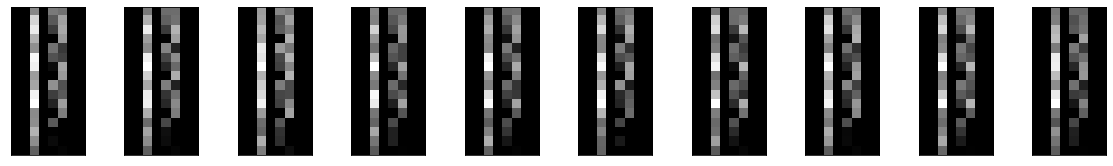

In [23]:
n = 10
plt.figure(figsize = (20,6))
for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(encoded.predict(np.array([x_train[i]])).reshape(16, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
#     ax = plt.subplot(2,n,i+1+n)
#     plt.imshow(decoded_audio[i].reshape(28,28))
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
plt.show
    

In [22]:
encoded.predict(np.array([x_train[i]])).shape

(1, 4, 4, 8)

In [20]:
x_train[i].shape

(28, 28, 1)